In [51]:
import pandas as pd
import numpy as np
import sys
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.max_rows = 999
np.set_printoptions(threshold=sys.maxsize)


In [52]:
df1 = pd.read_excel("PTSD.xlsx")
df2 = pd.read_excel("questionnaire6PCL3.xlsx")

In [53]:
df1 = df1[~df1.PCL3.isna()]

In [71]:
features = ["ID", "age", "highschool_diploma", "dyslexia", "ADHD", "T1Acc1t", "T1Acc1n", "T1bias", "phq1", "lot1",
                     "trait1",
                     "state1", "PCL1", "PCL_Broad1", "PCL_Strict1", "phq2", "lot2", "trait2", "state2", "PCL2",
                     "PCL_Broad2",
                     "PCL_Strict2", "cd_risc1", "active_coping1", "planning1", "positive_reframing1", "acceptance1",
                     "humor1",
                     "religion1", "emotional_support1", "instrumental_support1", "self_distraction1", "denial1",
                     "venting1", "substance_use1", "behavioral_disengagement1", "self_blame1", "active_coping2",
                     "planning2",
                     "positive_reframing2", "acceptance2", "humor2", "religion2", "emotional_support2",
                     "instrumental_support2",
                     "self_distraction2", "denial2", "venting2", "substance_use2", "behavioral_disengagement2",
                     "self_blame2",
                     "trauma_history8_1", "HML_5HTT", "HL_MAOA", "HML_NPY", "COMT_Ranked", "COMT_Hap1_recode",
                     "COMT_Hap2_recode", "COMT_Hap1_LvsMH", "HML_FKBP5", "Ashken_scale", "Sephar_scale", "Unknown"]

In [60]:
df1 = df1[["ID", "age", "highschool_diploma", "dyslexia", "ADHD", "T1Acc1t", "T1Acc1n", "T1bias", "phq1", "lot1",
                     "trait1",
                     "state1", "PCL1", "PCL_Broad1", "PCL_Strict1", "phq2", "lot2", "trait2", "state2", "PCL2",
                     "PCL_Broad2",
                     "PCL_Strict2", "cd_risc1", "active_coping1", "planning1", "positive_reframing1", "acceptance1",
                     "humor1",
                     "religion1", "emotional_support1", "instrumental_support1", "self_distraction1", "denial1",
                     "venting1", "substance_use1", "behavioral_disengagement1", "self_blame1", "active_coping2",
                     "planning2",
                     "positive_reframing2", "acceptance2", "humor2", "religion2", "emotional_support2",
                     "instrumental_support2",
                     "self_distraction2", "denial2", "venting2", "substance_use2", "behavioral_disengagement2",
                     "self_blame2",
                     "trauma_history8_1", "HML_5HTT", "HL_MAOA", "HML_NPY", "COMT_Ranked", "COMT_Hap1_recode",
                     "COMT_Hap2_recode", "COMT_Hap1_LvsMH", "HML_FKBP5", "Ashken_scale", "Sephar_scale", "Unknown"]]

In [65]:
df3 = df1.merge(df2.drop(['mean', 'pcl3', 'intrusion', 'avoidance', 'hypertention', 'PCL3_Strict', 'PrimaryLast'],axis=1), on="ID")

In [83]:
df3 = df3.fillna(df3.mean())

In [84]:
def corrcorr (df):
        names = list(df)
        correlations = df.corr()

        high_correlations = \
            [[names[i], names[j], correlations.values[i][j]] for i in range(len(names)) for j in range(len(names))
                if (i != j) and (np.abs(correlations) > 0.5).values[i][j]]

        high_correlations.sort(key=lambda x: x[2])
        with open( "high_correlation_all_df.txt", "w") as f:
            for i in high_correlations:
                f.write(str(i)+"\n")


In [21]:
corrcorr(df2.drop(['mean', 'pcl3', 'intrusion', 'avoidance', 'hypertention', 'PCL3_Strict', 'PrimaryLast'],axis=1))

In [64]:
corrcorr(df3.drop(['mean', 'pcl3', 'intrusion', 'avoidance', 'hypertention', 'PCL3_Strict', 'PrimaryLast'],axis=1))

In [85]:
from sklearn.model_selection import train_test_split


In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
targets = ['q6.11_NUMB', 'q6.7_AVSIT', 'q6.8_AMNES', 'q6.4_UPSET']

In [88]:
model = LinearRegression()
X = df3[features]
y = df3['q6.11_NUMB']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [90]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
y_pred = model.predict(X_test)

In [92]:
from sklearn.metrics import mean_squared_error

In [93]:
mean_squared_error(y_test, y_pred)

1.030668543335117

In [94]:
model = LinearRegression()
X = df3[features]
y = df3['q6.7_AVSIT']
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

0.7131474212155509

In [95]:
model = LinearRegression()
X = df3[features]
y = df3['q6.8_AMNES']
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

0.5791504645871732

In [107]:
model = LinearRegression()
X = df3[features]
y = df3['q6.4_UPSET']
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)


0.9417303438985274

In [104]:
from sklearn.ensemble import GradientBoostingRegressor

In [105]:
model = GradientBoostingRegressor()
X = df3[features]
y = df3['q6.7_AVSIT']
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

0.8208679594023048

In [106]:
model = GradientBoostingRegressor()
X = df3[features]
y = df3['q6.8_AMNES']
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

0.532828187935676

In [108]:
model = GradientBoostingRegressor()
X = df3[features]
y = df3['q6.4_UPSET']
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)


0.6877690769544477

In [109]:
model = GradientBoostingRegressor()
X = df3[features]
y = df3['q6.11_NUMB']
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)


0.883392940401319

In [110]:
from sklearn.ensemble import ExtraTreesRegressor

In [126]:
model = LinearRegression()
X = df3[features]
y = df3['q6.11_NUMB']
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)


0.8481153542908709

In [127]:
for i in zip(y_test, y_pred):
    if i[0]>2:
        print(i)

(4.0, 1.7686082899976454)
(5.0, 2.273650812317878)
(4.0, 1.4727687275094126)
(3.0, 1.4533424577799405)
(4.0, 1.2725476511428875)
(3.0, 1.4876027300124224)
(4.0, 1.5406840029515314)
(3.0, 2.0762373173970143)
(3.0, 2.873458282891788)
(4.0, 1.97617138366576)
(4.0, 1.4101478702970334)
(5.0, 1.9487106344403125)
(4.0, 2.348064891822436)
(4.0, 1.5843120495979128)
(3.0, 2.745261911079454)
(3.0, 2.4445453052730723)
(5.0, 1.8962443523417747)
(3.0, 2.6658890386039293)
(3.0, 2.1509176527242255)
(4.0, 1.5098045995167366)
(3.0, 1.758311013558143)
(5.0, 1.6031672689742558)
(3.0, 2.080101329980179)
(4.0, 1.9704279454066085)


In [128]:
import matplotlib.pyplot as plt

(array([509.,   6., 107.,   0.,   0.,  52.,   0.,  34.,   0.,  16.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

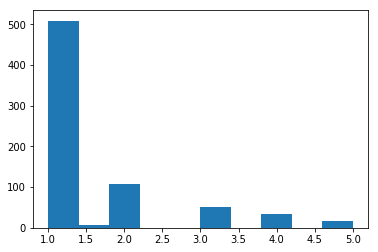

In [131]:
plt.hist(df3['q6.11_NUMB'])

In [ ]:
np.df3['q6.11_NUMB'] >

In [ ]:
model = GradientBoostingclassifier()
X = df3[features]
y = df3['q6.11_NUMB']
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)
